# Exploring the NIDS CRAM dataset
## by Rob Urquhart

## Preliminary Wrangling

> <br>For this exercise, I examined the NIDS-CRAM dataset. NIDS-CRAM is the National Income Dynamics Study - Coronavirus Rapid Mobile Survey.(Just over 7,000 participants completed the CRAM survey of over 100 questions.) The survey investigates the socioeconomic impacts of the national lockdown associated with the State of Disaster declared in South Africa in March 2020, and the social and economic consequences of the global Coronavirus pandemic. From March 23 through to early May 2020, South Africa was placed under an economic and social lockdown. During this period only essential services workers could physically attend work, and any other work involving physical or social interaction was suspended; impacting employment, incomes, and livelihoods. </br>
<br></br>
<br>The NIDS-CRAM dataset is publicly available from the University of Cape Town's Data First Open Portal, where it is available for download as a Stata file. I downloaded the data, and the read it into a Jupyter Notebook using the pyreadstat.read_dta(dtafile) command. Because the dataset had been coded, I first had to decode that data, and then deleted columns and transformed data types before saving the file as a .csv file. These data wrangling efforts are separately provided in the 'CRAM.ipynb' file.</br>
<br></br>
<br>* <b>Note to reader:</b> currency in this analysis is in South African Rands (R) - current exchange rate to the dollar is ± 16:1.</br>

### Dictionary of column headings ###

I have provided this dictionary of column headings to assist the viewer:

id - CRAM index number<br />born - year of birth<br />
gender - gender<br />
race - population group (official South Africa classification)<br />
grade - highest school grade completed<br />
tertiary - have you completed some form of tertiary study?<br />
province - province currently live in<br />
dweltyp - type of dwelling or house<br />
no_reside - number of people including self, in the household<br />
water - does your dwelling have access to pipe or tapped water on the property?<br />
elect - does your dwelling have electricity?<br />
work_feb - in February, did you have any kind of job?<br />
emdays_feb - average work week (days) in February<br />
emhrs_feb - average work days (hours) in February<br />
feb_pay_pure - how much was your take home pay in February?<br />
feb_pay - how much was your take home pay in February (bracketed)?<br />
work_apr - in April, did you have any kind of job?<br />
apr_return - do you have any form of job that you will return to in next 4 weeks <br />
worktype - respondent's main form of work<br />
work_code - occupational code classification for usual work performed<br />
emdays_apr - average work week (days) in April<br />
emhrs_apr - average work days (hours) in April<br />
apr_pay_pure - how much was your take home pay in April?<br />
apr_pay - how much was your take home pay in April (bracketed)?<br />
uif_ters - did you receive income from UIF TERS in April? (UIF TERS - unemployment fund temporary relief scheme)<br />
work_seek - did you actively look for work in April?<br />
last_seek - when was the last time you looked for work?<br />
hh_childgrant - number of childgrant the household receives<br />
any_childgrant - anyone in the household receive a child grant?<br />
hh_govpen - number of pension grant the household receives<br />
any_govpen - anyone in the household receives a govnt pension?<br />
grant_rec - did you receive any type of government grant?<br />
grantyp1 - type of government grant received 1<br />
grantyp2 - type of government grant received 2<br />
grantyp3 - type of government grant received 3<br />
hhincsource1 - sources of household income in February 1<br />
hhincsource2 - sources of household income in February 2<br />
hhincsource3 - sources of household income in February 3<br />
hhincdec1 - shource of household income decreased during lockdown 1<br />
hhincdec2 - shource of household income decreased during lockdown 2<br />
hhincdec3 - shource of household income decreased during lockdown 3<br />
apr_hh_inc - total household income in april<br />
hh_inc_lost - has household lost income since lockdown on 27 March<br />
nomoneyfood - did the household run out of money for food in April<br />
7dayshungry - in last 7 days, did anyone in the household go hungry because of lack of food<br />
chldcr - In April did you spend more time than usual looking after children?<br />
time_chldcr - how much more time spend per day on childcare?<br />
kids_in_school - how many kids in school (grade 0-12) before they closed?<br />
ed_books - in last 7 days, did children in household use their school books?<br />
edtv - in last 7 days, did children in household watch educational TV?<br />
edradio - in last 7 days, did children in household listen to educational radio?<br />
edonline - in last 7 days, did children in household access educational content online?<br />
suppgov - did you receive food or shelter from the government?<br />
suppngo - did you receive food or shelter from an NGO, church or similar organisation?<br />
suppcom - did you receive food or shelter from your neighbourhood or community?<br />

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('CRAMS_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pid             7073 non-null   int64  
 1   born            7069 non-null   float64
 2   age             6801 non-null   float64
 3   gender          7067 non-null   object 
 4   race            7063 non-null   object 
 5   grade           7028 non-null   object 
 6   tertiary        5375 non-null   object 
 7   province        7068 non-null   object 
 8   dweltyp         7067 non-null   object 
 9   no_reside       7041 non-null   float64
 10  water           7068 non-null   object 
 11  elect           7071 non-null   object 
 12  work_feb        6997 non-null   object 
 13  emdays_feb      3141 non-null   float64
 14  emhrs_feb       3007 non-null   float64
 15  feb_pay_pure    2653 non-null   float64
 16  feb_pay         552 non-null    object 
 17  work_apr        6329 non-null   o

### What is the structure of your dataset?

> There are 7073 interview responses in the dataset, across 56 questions or features. Alot of the data is qualitative in nature and mostly nominal or categorical (e.g. 'work_code' are occupational categories.) There is some quantitative data which is mostly discrete but feb_pay_pure and apr_pay_pure is continuous.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring differences between women and men  in the data. And I'm interested in understanding how the initial very stringent lockdown in South Africa which effectively shut down economic activity for five weeks (which began March 23 and ran through to end April) impacted the respondents differently. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Gender, age, occupational category, income earnings and change in earnings between February and March, household size.

## Univariate Exploration


### Looking at income earned ###

In [3]:
# Looking at income earned in february

fig=px.histogram(df, x='feb_pay_pure', template='none')
fig.update_yaxes(showgrid=False, zeroline=True)

The histrogram skews right with a very long tail which hides the data - I'm shortening the scale

In [4]:
#shortening the scale to get a better sense of it
fig=px.histogram(df, x='feb_pay_pure', range_x=(0, 25000), title ='Distribution of pay earned in February',
             labels=dict(feb_pay_pure="Pay earned in February ('000s') Rands", count="Count"), template='none')
fig.update_yaxes(showgrid=False, zeroline=True)

We can see the monthly earnings in February for the survey respondents is generally low - tailing off after about R3,000 per month.

In [5]:
# repeating this to look at income in April
fig2=px.histogram(df, x='apr_pay_pure', range_x=(0, 25000), title='Distribution of pay earned in April',  
             labels=dict(apr_pay_pure="Pay earned in April ('000s) Rands", count="Count"), template='none')
fig2.update_yaxes(showgrid=False, zeroline=True)

A more or less similar shape, but what is noticable is the change in scale - it appears from the count that fewer people are earning in April

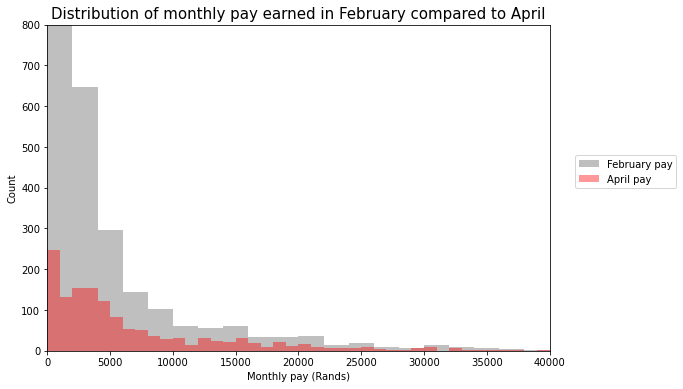

In [6]:
# Overlapping both histgrams
plt.figure(figsize=(9,6))
plt.hist(data=df, x='feb_pay_pure', bins=100, alpha=0.5, label="february pay", color='grey')
plt.hist(data=df, x='apr_pay_pure', bins=100, alpha=0.4, label="april pay", color = 'red');
plt.xlim(0,40000)
plt.ylim(0,800)
plt.xlabel('Monthly pay (Rands)')
plt.ylabel('Count')
plt.legend(title='', labels=['February pay', 'April pay'],bbox_to_anchor=(1.05, .6), loc=2, borderaxespad=0.)
plt.title('Distribution of monthly pay earned in February compared to April', fontsize=15);

### Looking at age ###

In [7]:
px.histogram(df, x='age')

Age is similarly skewed to the right with a high peak in the mid-30s and early 20s. But actual age can be difficult to work with

In [8]:
# Create age brackets (bins)
df['age_bins'] = pd.cut(x=df['age'], bins=[0,20,30,40,50,60,70,80], labels=['under 20', '21-30', '31-40', '41-50','51-60','61-70','71-80'])

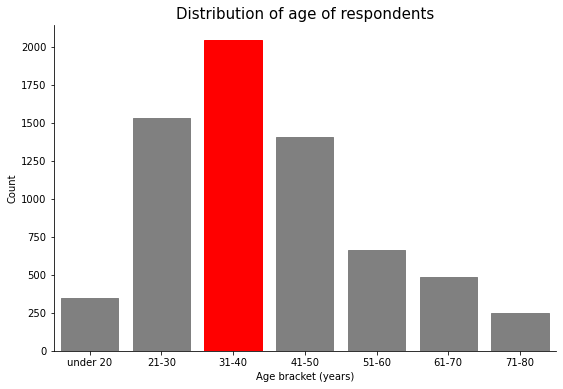

In [9]:
# graphing age bins
plt.figure(figsize=(9,6))
ax=sb.countplot(data=df, x='age_bins', order=['under 20','21-30','31-40','41-50','51-60','61-70','71-80']);
for bar in ax.patches:
    if bar.get_height() > 1750:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
# setting title and sorting out axes
plt.title('Distribution of age of respondents', fontsize=15)
plt.xlabel ('Age bracket (years)')
plt.ylabel('Count')

# removing frame around the graph
sb.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

That's much more elegant- and we can see a distribution that peaks in the 31-40 category. 

### Looking at gender ###

In [10]:
df = df.dropna(subset=['gender'])
px.pie(df, values='pid',names='gender')

We can see that nearly two-thirds of respondents were female

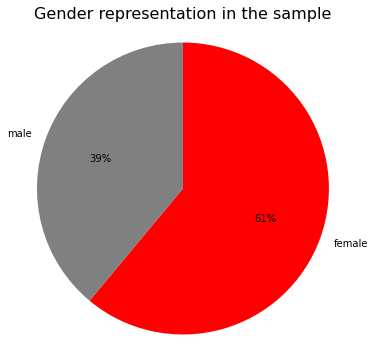

In [11]:
# Putting the pie into matplotlib and tidying up
sorted_counts = df['gender'].value_counts()
plt.figure(figsize=(9,6))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, colors=['red','grey'], autopct='%.0f%%')
plt.title('Gender representation in the sample', fontsize=16)
plt.axis('square');

### Looking at occupational codes ###

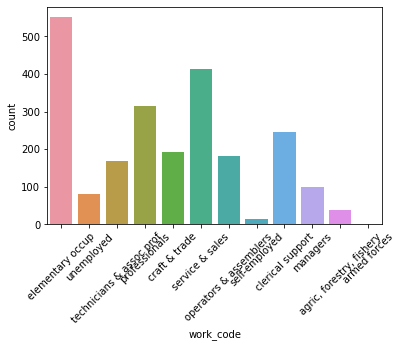

In [12]:
# plotting occupational codes
df_code = df.dropna(subset=['work_code'])
df_code
ax=sb.countplot(data=df_code, x='work_code')
plt.xticks(rotation=45);

It appears that there are no workers in agriculture and armed forces, but I also don't want unemployed in this graph

In [13]:
# checking the value counts per category in work_code
df_code.work_code.value_counts()

elementary occup            551
service & sales             412
professionals               315
clerical support            246
craft & trade               193
operators & assemblers      182
technicians & assoc prof    169
managers                    100
unemployed                   81
agric, forestry, fishery     39
self-employed                13
armed forces                  2
Name: work_code, dtype: int64

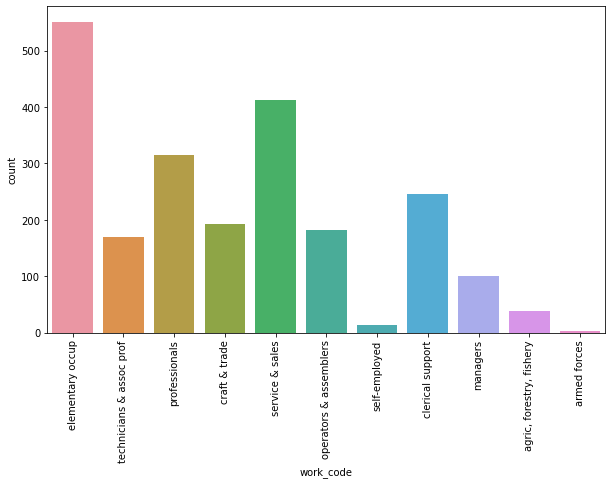

In [14]:
# Dropping the unemployed and resizing the plot
df_code = df_code[df.work_code != 'unemployed']
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(data=df_code, x='work_code', ax=ax)
plt.xticks(rotation=90);

Highest representation of respondents in elementary occupations and then services and sales. Elementary occupations are low-skilled occupations which might explain the skew in pay to the right

### Looking at days and hours ###

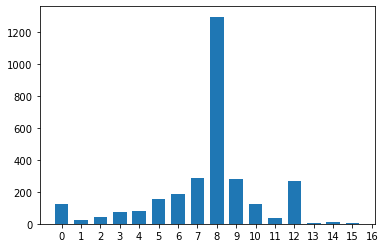

In [15]:
# Plotting a histogram of number of hours work per day in February
plt.hist(data=df, x='emhrs_feb', bins=np.arange(17)-0.5, rwidth = 0.7)
plt.xticks(np.arange(0, 17, 1));

Not unsurprisingly 8 hours - a typically standard working day - is most prevalent

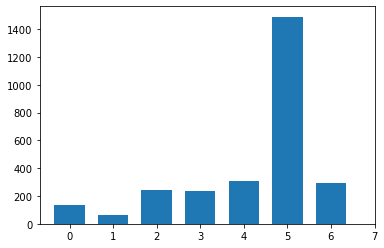

In [16]:
# Plotting a histogram of number of days worked per week in Febuary
plt.hist(data=df, x='emdays_feb', bins=np.arange(8)-0.5, rwidth = 0.7)
plt.xticks(np.arange(0, 8, 1));

Similarly not unsurprisingly 5 days a week - a standard working week - is most prevalent

### Looking at number of child grants received by a household ###

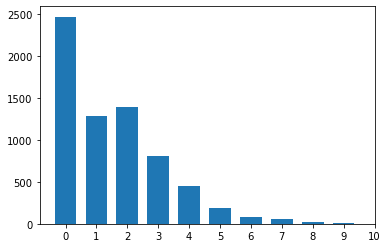

In [17]:
# looking at number of child grants the household received
plt.hist(data=df, x='hh_childgrant', bins=np.arange(11)-0.5, rwidth = 0.7)
plt.xticks(np.arange(0, 11, 1));

Child grants are a form of social welfare paid to households earning very little or no income, or income below a threshold. In times of unemployment social welfare grants like the child grant can provide a monetary buffer for a household. There is a high frequency of households reporting that there are no child grants received by their household with households receiving 1, 2 or 3 as the next most frequently occuring. It might be interesting at a later stage to understand the frequency of child grants for households earning below R3,500 (the living wage for South Africa.)

### Looking at the number of children in school ###

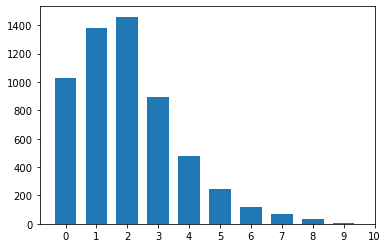

In [18]:
# Exploring the number of children in school
plt.hist(data=df, x='kids_in_school', bins=np.arange(11)-0.5, rwidth = 0.7)
plt.xticks(np.arange(0, 11, 1));

A distribution skewed to the right, with a high frequency of respondents reporting 2 children in school.

### Looking at the number of people in a household ###

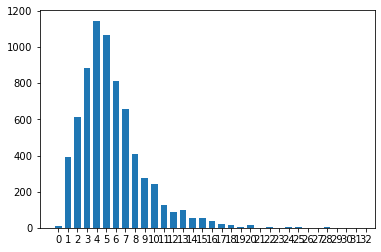

In [19]:
# Exploring the number of people residing in a single household
plt.hist(data=df, x='no_reside', bins=np.arange(33)-0.5, rwidth = 0.7)
plt.xticks(np.arange(0, 33, 1));

In [20]:
df.no_reside.describe()

count    7037.000000
mean        5.556203
std         3.312273
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.000000
Name: no_reside, dtype: float64

A right skewed distribution, with a high frequency at 4 people in the household. There is a very long tail with a maximum value of 32, and a 75th percentile of 7 - that's a big gap for the last quartertile. It may be better to clip the axis here.

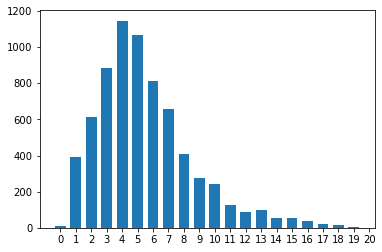

In [21]:
# Exploring the number of people residing in a single household - shortened x-axis
plt.hist(data=df, x='no_reside', bins=np.arange(21)-0.5, rwidth = 0.7)
plt.xticks(np.arange(0, 21, 1));

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Yes. Age had an unusual shape, so I created age bins to get a clearer picture of the data. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes. Because there are some outliers in pay, I cut the scale to exclude these and get a clearer view of the data. For occupational category, I dropped the variable 'unemployed' which isn't relevant in this context. I also rotated the x-axis labels so that they didn't run into each other. For hours in a day, and days in a week worked in February, I aligned the xticks with the histogram bars for accurate visual interpretation. And for the number of people in the household, I clipped the x-axis for better visual interpretation.

## Bivariate Exploration


### The relationship between pay in February and April ###

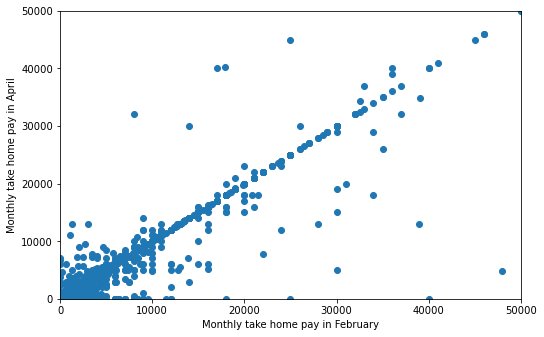

In [22]:
# what is the relationship between pay earned in February and pay earned in April?

fig= plt.figure(figsize=(8,5)) # made the axis larger to see the data better
axes= fig.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(data=df,x='feb_pay_pure', y='apr_pay_pure')
plt.xlabel('Monthly take home pay in February')
plt.ylabel('Monthly take home pay in April')
plt.ylim((0,50000)) # Set the axes limits to deal with outliers
plt.xlim((0,50000));

There's a pretty linear relationship between pay in February and pay in April, but there's alot of variance at the lower end of the scale, so I'm going to set the limits further. We know from the univariate exploration that there's alot of responses under R5,000.

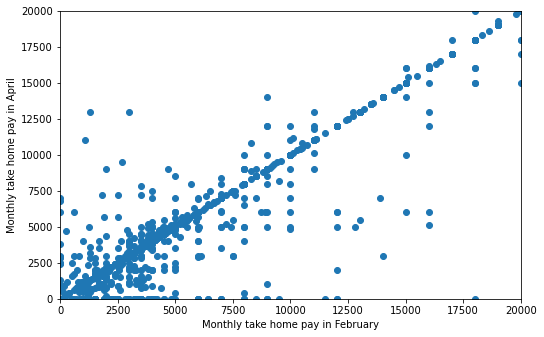

In [23]:
fig= plt.figure(figsize=(8,5)) 
axes= fig.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(data=df,x='feb_pay_pure', y='apr_pay_pure')
plt.xlabel('Monthly take home pay in February')
plt.ylabel('Monthly take home pay in April')
plt.ylim((0,20000)) 
plt.xlim((0,20000));

That's alot more granularity and you can start to see greater variance with some who earned in February, earning nothing in April. But I'm going to zoom in even further.

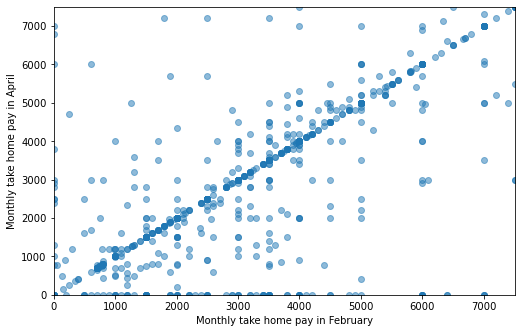

In [24]:
fig= plt.figure(figsize=(8,5)) 
axes= fig.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(data=df,x='feb_pay_pure', y='apr_pay_pure', alpha=0.5)
plt.xlabel('Monthly take home pay in February')
plt.ylabel('Monthly take home pay in April')
plt.ylim((0,7500)) 
plt.xlim((0,7500));

A linear relationship still exists, but one can see instances of pay both declining as well as increasing in April vis-a-vis February.

### Exploring the relationship between variables more generally ###

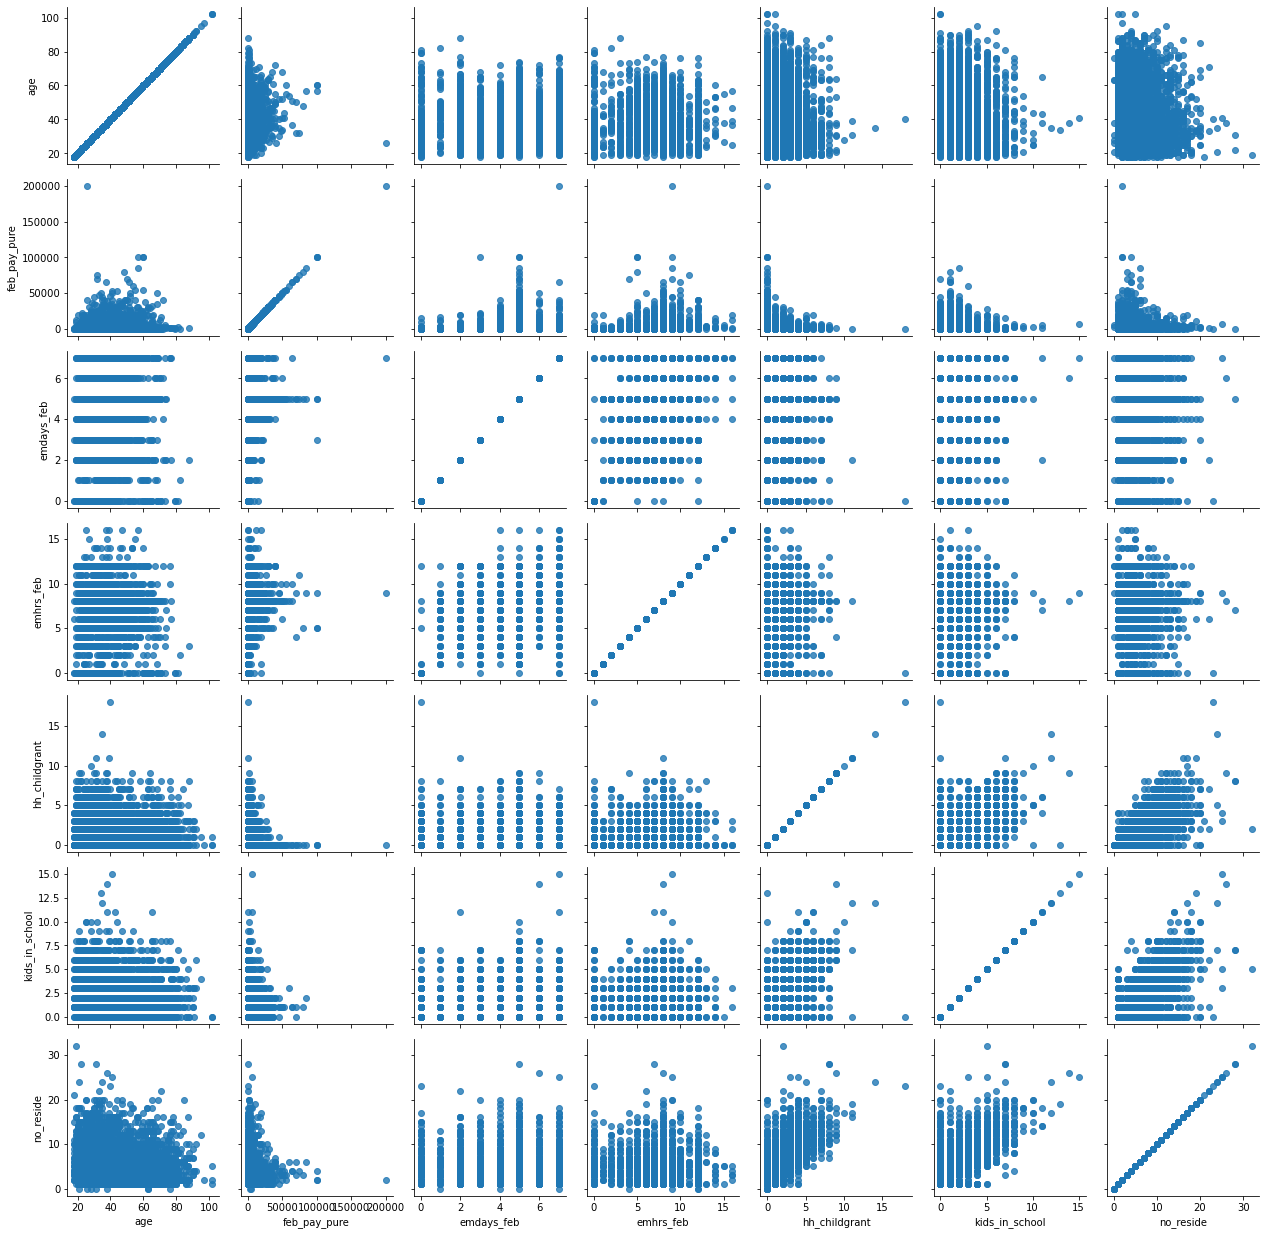

In [25]:
# Using pairgrids to have a quick look at relationships between variables
g = sb.PairGrid(df, vars=['age', 'feb_pay_pure', 'emdays_feb', 'emhrs_feb', 'hh_childgrant','kids_in_school', 'no_reside'],
                  palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

A quick glance suggests some possible relationships to explore include the relationship between monthly income ('feb_pay_pure') and number of childhood grants the household receives ('hh_childgrant') as well as 'feb_pay_pure' and 'emhours_feb' (hours per day worked in February.)

### Looking at the relationship between gender and pay in February and April ###

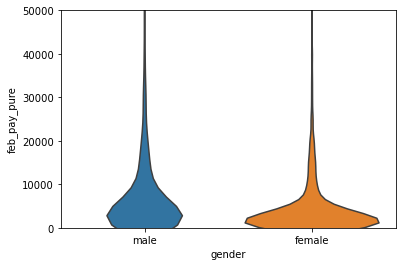

In [26]:
# Using violin plots to look at the relationship between gender and monthly income earned in February
sb.violinplot(data=df, x='gender', y='feb_pay_pure', inner=None);
plt.ylim((0,50000)); #50,000 based on the limit used in the univariate exploration

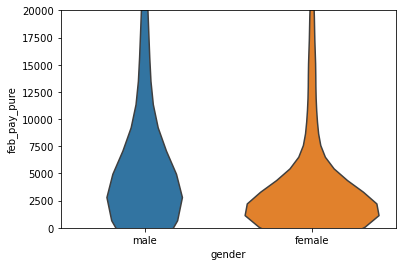

In [27]:
# Using violin plots to look at the relationship between gender and monthly income earned in February - zooming in
sb.violinplot(data=df, x='gender', y='feb_pay_pure', inner=None);
plt.ylim((0,20000)); 

Both male and female pay has long tails, although it appears that it starts later for men. The bulge for women is also flatter for women pointing to more data points in this range. Could men earn more than women?

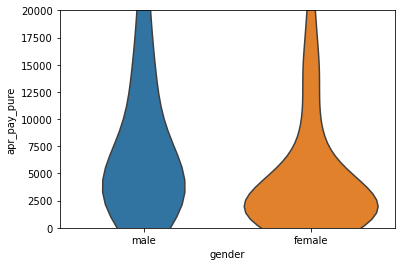

In [28]:
# Looking at the violin for pay in april by gender by zooming in
sb.violinplot(data=df, x='gender', y='apr_pay_pure', inner=None);
plt.ylim((0,20000));

February to April looks very similar, although the funnels are slightly thicker pointing to more data points at higher earnings in April. That's unexpected.

### Exploring changes in employment status betweeen February and April ###
<br> The one thing I'd like to explore is how the employment status changed between February and April, for those who had a job in February</br>

In [29]:
# setting up a data frame called df_clear to look at changed status in employment between February and April
# cleaning na's from work_feb and work_apr

df_clear = df.loc[((df['work_feb'].notna()) & (df['work_apr'].notna()))]

# Setting up a new column called status that records whether those working in Feb, are now working in April

def change(x):
    emp_feb = x['work_feb']
    emp_apr = x['work_apr']
    
    if emp_feb == 'yes' and emp_apr=='yes':
        return 'employed'
    elif emp_feb =='yes' and emp_apr=='no':
        return 'unemployed'
    else:
        return 'ex'

df_clear['status']=df_clear.apply(change, axis=1)
df_clear

# dropping 'ex' which would be those employed in Feb and in April
df_clear = df_clear[df_clear.status != 'ex']

#Checking that status appears
df_clear.head()

pid    born   age  gender      race grade tertiary province  \
0   301013  1981.0  39.0    male  coloured     9       no  gauteng   
3   301062  1972.0  48.0  female   african    10       no  gauteng   
9   301082  1989.0  31.0    male   african    10       no  gauteng   
10  301086  1972.0  48.0  female   african    12      yes    natal   
15  301105  1968.0  52.0  female  coloured    12       no  gauteng   

       dweltyp  no_reside  ... kids_in_school ed_books edtv  edradio  \
0   house/flat        3.0  ...            NaN      NaN  NaN      NaN   
3   house/flat        4.0  ...            2.0      yes  yes      yes   
9     informal        3.0  ...            NaN      NaN  NaN      NaN   
10  house/flat        4.0  ...            2.0      yes  yes      yes   
15  house/flat        4.0  ...            1.0      yes  yes       no   

    edonline  suppgov suppngo suppcom age_bins      status  
0        NaN       no      no      no    31-40  unemployed  
3        yes       no     yes     yes    41-50  unemployed  
9        NaN       no      no      no    31-40  unemployed  
10       yes       no     yes      no    41-50  unemployed  
15       NaN       no      no      no    51-60    employed  

[5 rows x 58 columns]

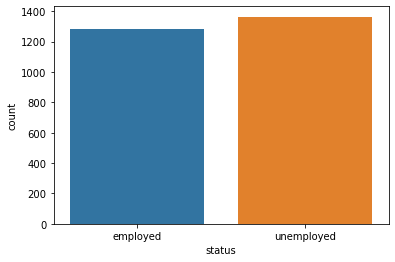

In [30]:
# overall plot for those employed in February, how many are still employed versus unemployed.
# a stacked bar might be better as the extent of change in employment is lost in this way
ax=sb.countplot(data=df_clear, x='status', order=['employed','unemployed']);

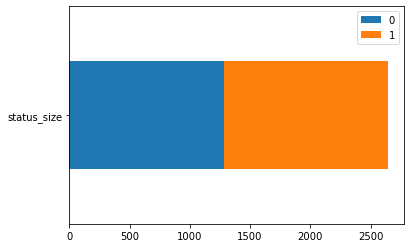

In [31]:
# showing this as as stacked bar plot
# grouping size of status in April
df_clear1 = df_clear.groupby(['status']).agg(status_size=('status', 'size')).reset_index()

#Transforming the series into 2 columsn
df_clear1.status_size.to_frame().T.plot.barh(stacked=True);

In [32]:
# Converting df_clear 1 to percentages
df_clear1['percent']=(df_clear1['status_size']/df_clear1['status_size'].sum())
df_clear1

status  status_size   percent
0    employed         1282  0.484505
1  unemployed         1364  0.515495

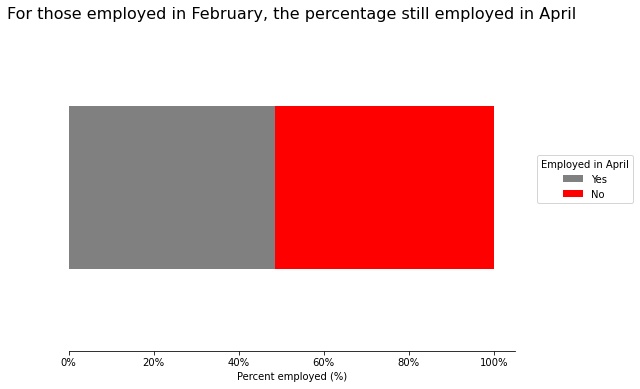

In [33]:
from matplotlib.ticker import FuncFormatter

# And then plotting percent rather than count as a stacked bar, and tidying up

g=stack1=df_clear1.percent.to_frame().T.plot.barh(stacked=True, color={0:'grey', 1:'red'}, legend=False, figsize=(8,6))
ax.legend_out=True
sb.despine(fig=None, ax=g, top=True, right=True, left=True, bottom=False, offset=None, trim=False);

# getting rid of  y ticks
g.set(yticks=[])

# adding a title
plt.title('For those employed in February, the percentage still employed in April', fontsize=16)

# changing the legend location
plt.legend(title='Employed in April', labels=['Yes', 'No'],bbox_to_anchor=(1.05, .6), loc=2, borderaxespad=0. );

# format x axis
g.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
g.set(xlabel="Percent employed (%)");

Some polishing to do but we can see that nearly half of those who were employed February, are now unemployed in April. Scary stuff.

### Has the mean earnings by gender changed between February and April? ###

In [34]:
# Pay at Feb by gender
gend_pay = df.groupby(['gender']).agg(feb_pay_pure_mean=('feb_pay_pure', 'mean')).reset_index()
px.histogram(gend_pay, x='gender', y='feb_pay_pure_mean')

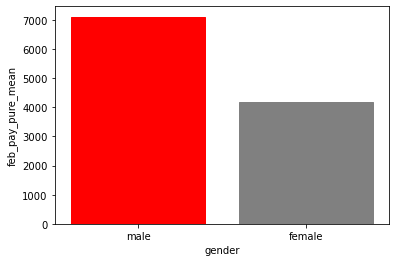

In [35]:
# Setting a tidier bar plot
ax=sb.barplot(x = 'gender', y = 'feb_pay_pure_mean', data = gend_pay, order = ['male', 'female'])
for bar in ax.patches:
    if bar.get_height() > 5000:
        bar.set_color('red')    
    else:
        bar.set_color('grey');

On average, men earn more than women in this dataset for February. Almost twice as much.

In [36]:
# Pay at april by gender
gend_pay2 = df.groupby(['gender']).agg(apr_pay_pure_mean=('apr_pay_pure', 'mean')).reset_index()
px.histogram(gend_pay2, x='gender', y='apr_pay_pure_mean')

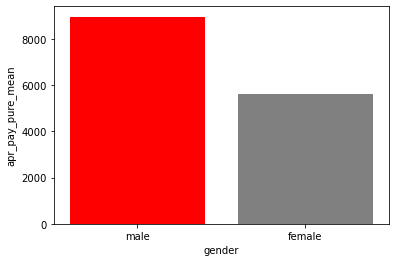

In [37]:
ax=sb.barplot(x = 'gender', y = 'apr_pay_pure_mean', data = gend_pay2, order = ['male', 'female'])
for bar in ax.patches:
    if bar.get_height() >6000:
        bar.set_color('red')    
    else:
        bar.set_color('grey');

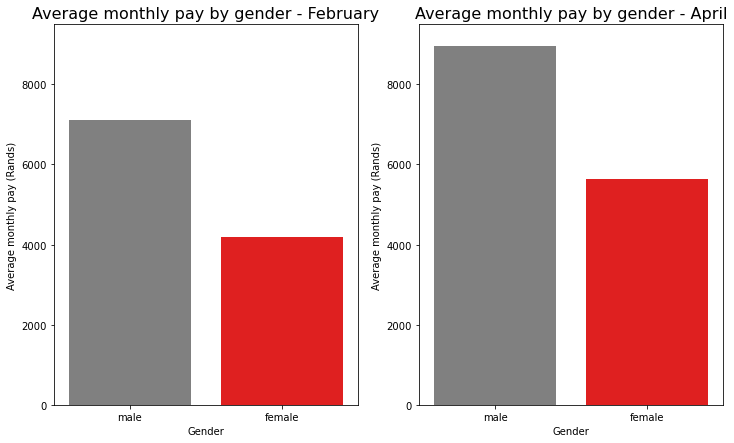

In [38]:
# Setting both bar charts next to each other
gend_pay = df.groupby(['gender']).agg(feb_pay_pure_mean=('feb_pay_pure', 'mean')).reset_index()
gend_pay2 = df.groupby(['gender']).agg(apr_pay_pure_mean=('apr_pay_pure', 'mean')).reset_index()

plt.figure(figsize = [12, 7])

# Plot of mean earnings by gender in February
plt.subplot(1, 2, 1)
ax1=sb.barplot(x = 'gender', y = 'feb_pay_pure_mean', data = gend_pay, order = ['male', 'female'], palette=['#808080','#ff0000'])
plt.title('Average monthly pay by gender - February', fontsize=16)
ax1.set(ylabel='Average monthly pay (Rands)',xlabel='Gender')
plt.ylim(0,9500);

# Plot of mean earnings by gender in April
plt.subplot(1, 2, 2)
ax=sb.barplot(x = 'gender', y = 'apr_pay_pure_mean', data = gend_pay2, order = ['male', 'female'],palette=['#808080','#ff0000'])
plt.title('Average monthly pay by gender - April', fontsize=16)
ax.set(ylabel='Average monthly pay (Rands)',xlabel='Gender')
plt.ylim(0,9500);

That is interesting. For those working in April - for men and women - pay seems to have increased (although we should check for outliers.) Interestingly - although not shown side-by-side here, pay for women has risen by approximately R1,500 whilst for men its closer to R2,000 additional per month. One reason for the rise (not the discrepancy) is what was regarded as essential services work.

### How has hours per day worked changed by gender between February and April? ###

In [39]:
# mean no. of hours per day worked by women versus men february
feb_hrs = df.groupby(['gender']).agg(emhrs_feb_mean=('emhrs_feb', 'mean')).reset_index()
px.bar(feb_hrs, x='gender', y='emhrs_feb_mean')

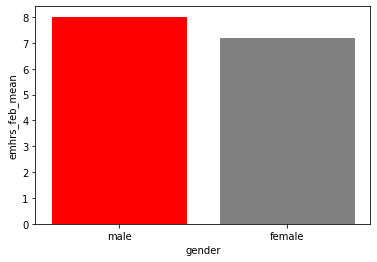

In [40]:
ax=sb.barplot(x = 'gender', y = 'emhrs_feb_mean', data = feb_hrs, order = ['male', 'female'])
for bar in ax.patches:
    if bar.get_height() > 7.5:
        bar.set_color('red')    
    else:
        bar.set_color('grey');

In [41]:
# mean no. of hours per day worked by women versus men april
apr_hrs = df.groupby(['gender']).agg(emhrs_apr_mean=('emhrs_apr', 'mean')).reset_index()
px.bar(apr_hrs, x='gender', y='emhrs_apr_mean')

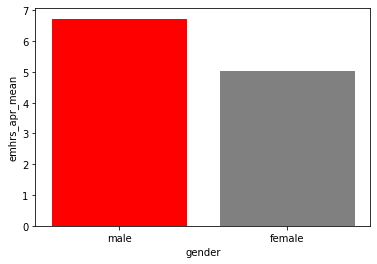

In [42]:
ax=sb.barplot(x = 'gender', y = 'emhrs_apr_mean', data = apr_hrs, order = ['male', 'female'])
for bar in ax.patches:
    if bar.get_height() > 5.5:
        bar.set_color('red')    
    else:
        bar.set_color('grey');

We can see that between February and April, the average hours worked per day dropped by nearly two for women, and a little over one for men. 

### Who was more affected by unemployment between February and April - men or women? ###

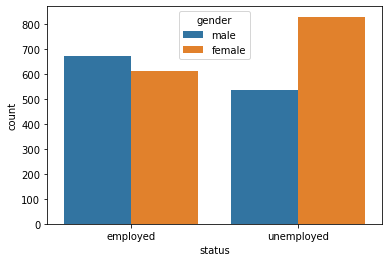

In [43]:
# how men versus women experience unemployment - who employed in Feb are now unemployed in April?
df_wg=df_clear[df_clear.work_feb != 'retired']
sb.countplot(data=df_wg, x='status', hue='gender', order=['employed','unemployed']);

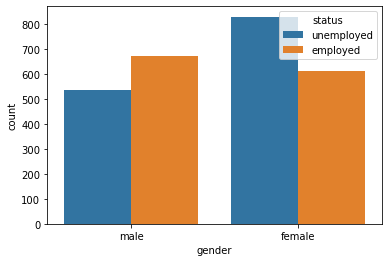

In [44]:
# Just looking at this differently - it may be better to show it this way
sb.countplot(data=df_wg, x='gender', hue ='status');

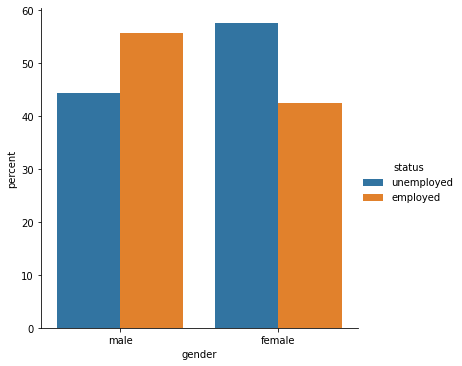

In [45]:
# Turning this into percentages
x,y = 'gender', 'status'

(df_wg
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar', order=['male','female']));

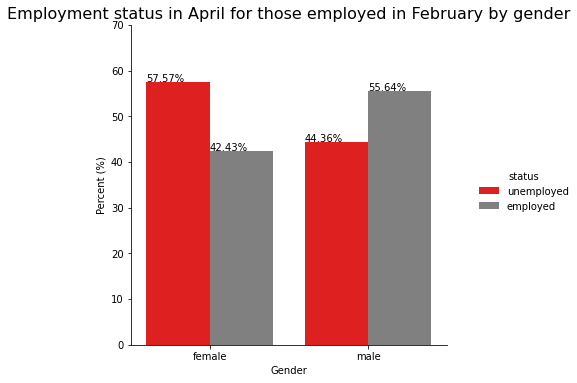

In [46]:
# Tidying the plot up
df_wg=df_clear[df_clear.work_feb != 'retired']


# Adding data labels
x,y = 'gender', 'status'

df1 = df_wg.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette=['#ff0000','#808080']);
ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.ylim (0,70)
plt.title('Employment status in April for those employed in February by gender', fontsize=16)
g.set(xlabel='Gender', ylabel='Percent (%)');

A higher proportion of women who held jobs in February, were unemployed in April - nearly 60% of women as opposed to just over 40%.

### What is gender representation by occupational category? ###

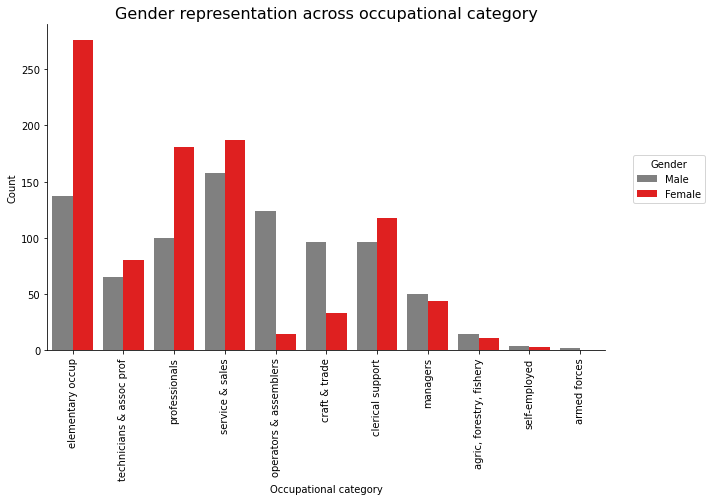

In [47]:
# Looking at gender representation against work_code (occupational category)

# Ignoring the unemployed category
df_og=df_clear[df_clear.work_code != 'unemployed']

#Setting the plot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sb.countplot(data=df_og, x='work_code', hue='gender', palette=['#808080','#ff0000'])
plt.xticks(rotation=90);
sb.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

# Title, labels, legends
plt.legend(title='Gender', labels=['Male', 'Female'],bbox_to_anchor=(1.05, .6), loc=2, borderaxespad=0. )
ax.set(xlabel="Occupational category", ylabel='Count')
plt.title('Gender representation across occupational category', fontsize=16);

With the exception of crafts and trade, and operators and assemblers (typically industrial or manufacturing-type of work), women are more highly represented in occupations than men. (However our sample is also more highly represented by women.) Women are also highly represented in elementary occupations - the lowest skilled.

### How did men versus women report their experience of childcare during lockdown? ###

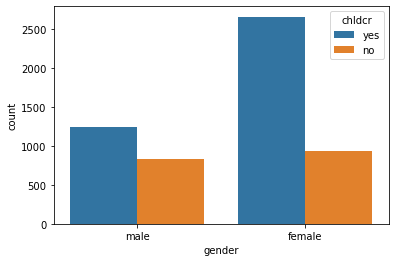

In [48]:
# what gender reported that childcare increased during lockdown
sb.countplot(data=df, x='gender', hue='chldcr');

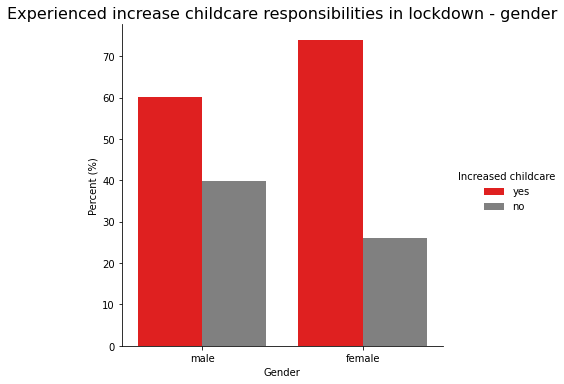

In [59]:
# Turning this into percentages
x,y = 'gender', 'chldcr'

g=(df.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=['#ff0000','#808080'], order=['male','female']))
plt.title('Experienced increase childcare responsibilities in lockdown - gender', fontsize=16)
new_title = 'Increased childcare'
g._legend.set_title(new_title)
g.set(xlabel="Gender", ylabel='Percent (%)');

Approximately 40% of men reported that they believed their childcare responsibilities hadn't increased during lockdown, compared to approximately 25% of women - suggesting that women experienced a higher burden of childcare during lockdown.

### By how much did childcare increase for men versus women? ###

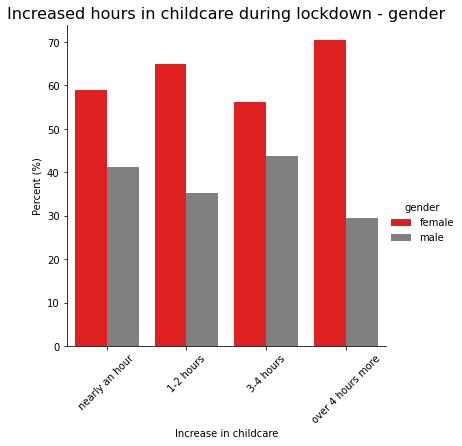

In [50]:
# for those that reported childcare increased, how does this look different for gender?
#sb.countplot(data=df, x='time_chldcr', hue='gender');
x,y = 'time_chldcr', 'gender'

g=(df.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette=['#ff0000','#808080'], 
      order=['nearly an hour','1-2 hours','3-4 hours','over 4 hours more']))
plt.title('Increased hours in childcare during lockdown - gender', fontsize=16)
g.set(xlabel="Increase in childcare", ylabel='Percent (%)')
plt.xticks(rotation=45);

Proportionately across all categories, women reported a greater increase in childcare responsibilities; the most significantly differentiated in the category of having to provide four hours or more of childcare.

### Exploring the relationship between pay and age ###

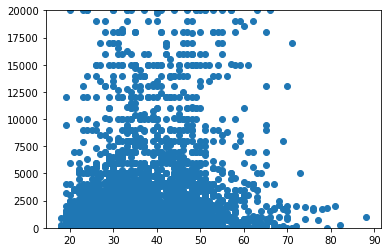

In [51]:
# looking at a scatter of earnings to age (unbracketed)
plt.scatter(data=df,x='age',y='feb_pay_pure');
plt.ylim((0,20000));

Although there is somewhat of right-skewed distribution at the bottom of the graph, there's quite alot of variance in earnings by age

### Looking at the relationship between monthly income and age ###

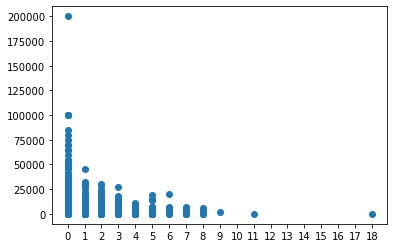

In [52]:
# Looking at relationship between monthly income and number of child grants received in the household
plt.scatter(data=df,x='hh_childgrant',y='feb_pay_pure');
plt.xticks(np.arange(0, 19, 1));
#plt.ylim((0,20000));

We can't say with certainty that households earning more are less likely to have a dependency on fewer child grants. But we can see that households with the higher monthly incomes do report zero child grants, and that the number of child grants dependent on seems to increase as income gets lower.

### Looking at the relationship between monthly income and number of child grants received ###

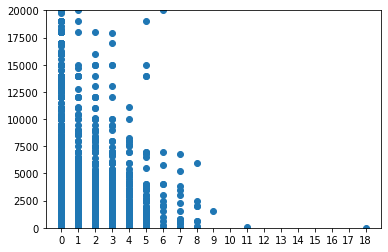

In [53]:
# Looking at relationship between monthly income and number of child grants received in the household - zoomed in
plt.scatter(data=df,x='hh_childgrant',y='feb_pay_pure');
plt.xticks(np.arange(0, 19, 1));
plt.ylim((0,20000));

Although still there, that shape deteriorates with more variability apparent.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> <br> 1. There is a mostly linear relationship between take-home pay in February and April. Interestingly though when zooming in, there appears to be almost as many instances of pay increasing in April vis-a-vis February as there are instances of pay decreasing in April vis-a-vis February.</br>
><br> 2. Even though this is the case, women earn less than men in both instances.</br>
><br> 3. It appears that nearly half of those who held jobs in February, were unemployed in April, but women were more adversely affected. </br>
><br> 4. Although both men and women reported higher childcare responsibilities during lockdown, a far higher proportion of women indicated so. For those reporting that they spent 4 hours or more on childcare, nearly 40% more women than men reported that this was the case.</br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> <br> 1. It would seem that a higher number of child grants households access is associated with lower income levels. </br>
><br> 2. There may be some relationship between age and income, but there appears to be quite alot of variance in the sample to comment with confidence fom the visualisations. </br>

## Multivariate Exploration


### Pay, gender, and occupation ###

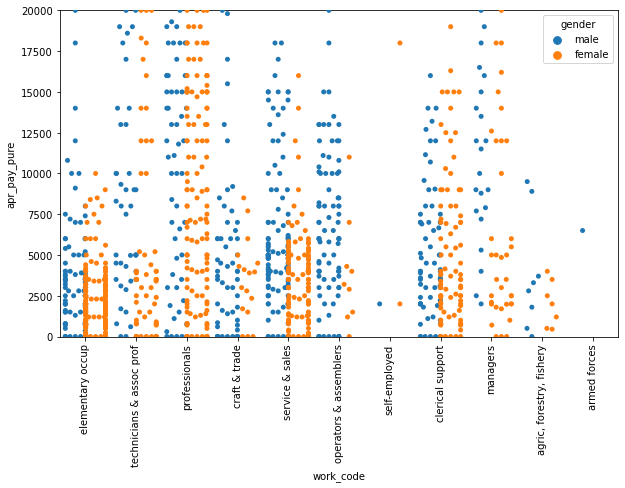

In [54]:
# Plotting a swarmplot for occupational code, income, and gender
df_gpo=df[df.work_code != 'unemployed']
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sb.swarmplot(data=df_gpo, x='work_code', y='apr_pay_pure', hue='gender', dodge=True);
plt.ylim(0,20000);
plt.xticks(rotation=90);

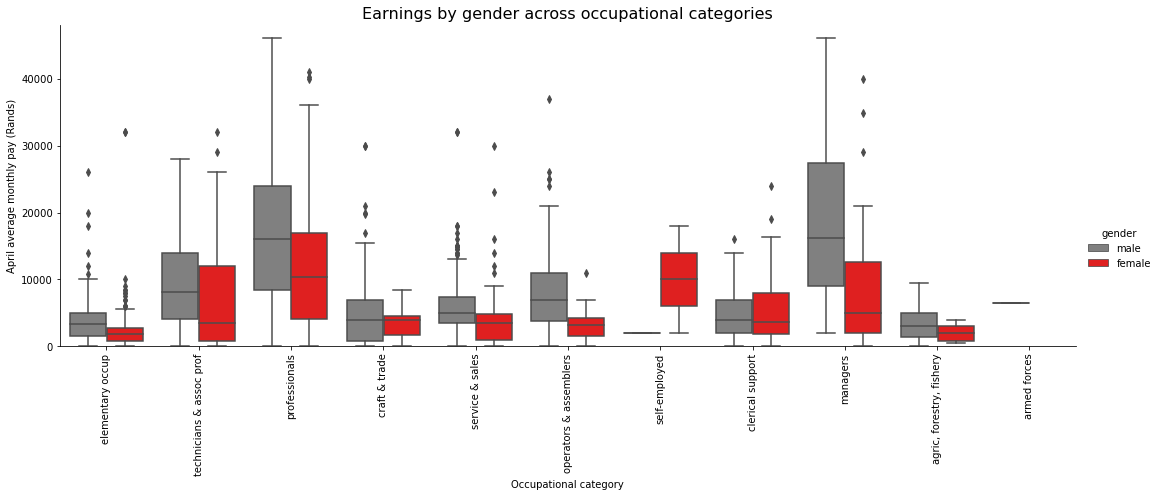

In [55]:
#Experimenting as a boxplot
df_gpo=df[df.work_code != 'unemployed']

g = sb.catplot(x="work_code", y="apr_pay_pure", hue="gender", 
               data=df_gpo, dodge=True, height=5, aspect=3, kind='box', palette=['#808080','#ff0000'])
plt.ylim(0,48000);
plt.xticks(rotation=90)
plt.title('Earnings by gender across occupational categories', fontsize=16)
g.set(xlabel="Occupational category", ylabel='April average monthly pay (Rands)');

This very clearly shows pay imbalances that women face. In the elementary occupations where they are significantly represented, their Q3 pay is lower than the median of men. Simiarly we can see how in professional and management categories how the ranges differ for men versus women.

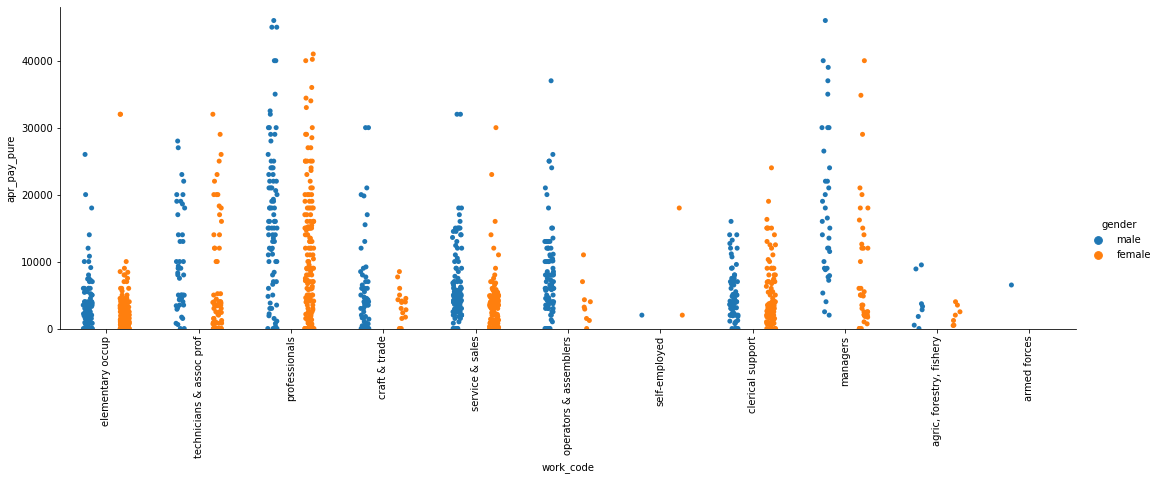

In [56]:
# Experimenting as a catplot
df_gpo=df[df.work_code != 'unemployed']
g = sb.catplot(x="work_code", y="apr_pay_pure", hue="gender", 
               data=df_gpo, dodge=True, height=5, aspect=3)
plt.ylim(0,48000);
plt.xticks(rotation=90);

Although this is prettier, it doesn't capture the discrepancies in pay for women which the box plot clearly shows

### Children in school, residents in households, child grants received ###

In [57]:
# Using color to plot the number of kids in school
px.scatter(df, x='hh_childgrant', y='kids_in_school', color='no_reside')

This doesn't really tell us much, other than perhaps darker colors in the lower left: fewer residents in the household, fewer kids in school, few child grants received by the household

### How has pay between February and April been affected for men and women? ###

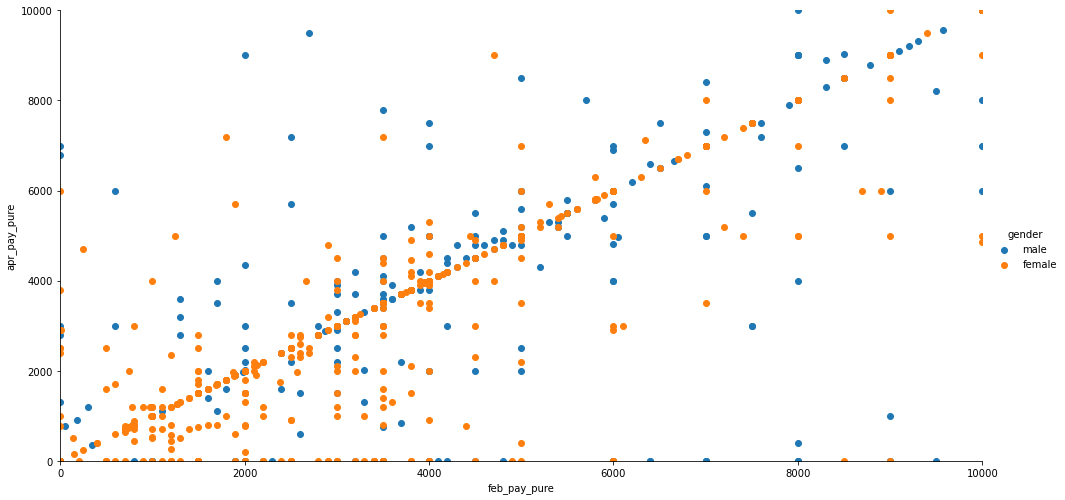

In [58]:
#palette='viridis-r'
g = sb.FacetGrid(data = df, hue = 'gender', height=7, aspect=2)
g.map(plt.scatter, 'feb_pay_pure', 'apr_pay_pure')
g.add_legend()
plt.ylim((0,10000)) 
plt.xlim((0,10000));

We can see that below the line, there are more orange markers (women) than blue (men) suggesting that take home pay in April was lower than in February. However there was higher representivity of women in the sample overall.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> <br> 1. The boxplot clearly shows us differentials in pay by occupational category (or industry.) In sales and services and elementary occupations their pay lags that of men significantly.</br>


### Were there any interesting or surprising interactions between features?

> <br> 1. We can see from the line plot of pay earned in February versus April that there continues to be a linear relationship, but visually it appears at lower monthly pay levels that their pay has dropped more than that of men.</br>

### Sources used ###
<br>1. To centre align x-ticks on a histogram: https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram</br>
<br>2.  This really nifty matplotlib resource: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html</br>
<br>3. To calculate a single, stacked bar: https://stackoverflow.com/questions/57850399/python-create-a-single-horizontal-stacked-bar-chart-from-pandas-data</br>
<br>4. Using Seaborn to change y-axis to a percent: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group</br>
<br> 5. Changing the location of a seaborn legend: https://www.thetopsites.net/article/53181278.shtml</br>
<br> 6. Changing the axis ticks to percentages: https://stackoverflow.com/questions/31357611/format-y-axis-as-percent</br>
<br> 7. Getting color hex codes: https://www.colorhexa.com/</br>